In [1]:
#importing all libraries
# pip install keras-tuner
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
# pip install keras-tuner
fashion_mnist = keras.datasets.fashion_mnist

2023-07-14 22:53:28.676695: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/intel/inteloneapi/tensorflow/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
(train_image, train_lables), (test_image, test_labels) = fashion_mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


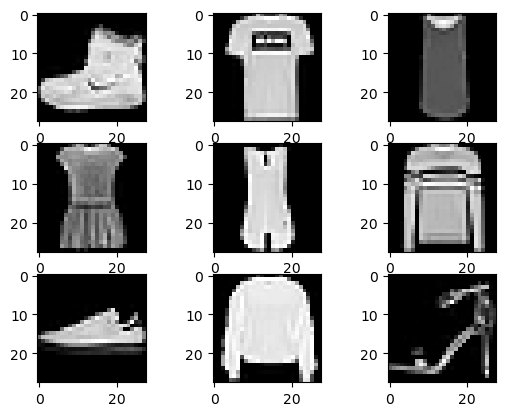

In [4]:
(train_image, train_lables), (test_image, test_labels) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_image.shape, train_lables.shape))
print('Test: X=%s, y=%s' % (test_image.shape, test_labels.shape))
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(train_image[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [5]:
train_image = train_image/255.0
test_image = test_image/255.0

In [6]:
train_image[0].shape

(28, 28)

In [7]:
train_image = train_image.reshape(len(train_image),28,28,1)
test_image = test_image.reshape(len(test_image),28,28,1)

In [8]:
def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(filters=hp.Int("conv_1_filter", min_value = 32, max_value = 128, step = 16), 
                                                kernel_size=hp.Choice("conv_1_kernel", values = [3,5]), 
                                                activation='relu', 
                                                input_shape=(28, 28, 1)
                                                ),
                            keras.layers.Conv2D(filters=hp.Int("conv_2_filter", min_value = 32, max_value = 64, step = 16), 
                                                kernel_size=hp.Choice("conv_2_kernel", values = [3,5]), 
                                                activation='relu', 
                                                input_shape=(28, 28, 1)
                                                ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int("dense_1_units", min_value = 32, max_value = 128, step = 16),
                                activation = 'relu'
                            ),
                            keras.layers.Dense(10, activation='softmax') #output_layer                            
                            
  ])
  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2,1e-3])),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [9]:
# pip install keras-tuner
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/home/u194056/tmp/ipykernel_3505841/357442678.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [10]:
tuner_search = RandomSearch(build_model,
                            objective = 'val_accuracy',
                            max_trials = 5,
                            directory = 'output',
                            project_name = "Mnist Fashion"
                            )

2023-07-14 22:53:35.447100: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [11]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
tuner_search.search(train_image, train_lables, epochs= 3, validation_split = 0.1)


Trial 5 Complete [00h 07m 55s]
val_accuracy: 0.8644999861717224

Best val_accuracy So Far: 0.9128333330154419
Total elapsed time: 00h 42m 16s
INFO:tensorflow:Oracle triggered exit


In [13]:
model = tuner_search.get_best_models(num_models = 1)[0]



In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 48)        57648     
                                                                 
 flatten (Flatten)           (None, 23232)             0         
                                                                 
 dense (Dense)               (None, 128)               2973824   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,033,242
Trainable params: 3,033,242
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.accuracy()

AttributeError: 'Sequential' object has no attribute 'accuracy'